# Problem

Traffic congestion and related problems are a common concern in urban areas. Understanding traffic patterns and analyzing data can provide valuable insights for transportation planning, infrastructure development, and congestion management.

Given several features, can we predict how the traffic condition gonna be with Artificial Neural Network

# Data

Data source: https://www.kaggle.com/datasets/hasibullahaman/traffic-prediction-dataset

# Evaluation

If the accuracy achieved is 95 percent through Ann model, maybe it will be deployed

# Features

feature label consist of:

1. Time
2. Date 
3. Day of week - Particular day in week
4. CarCount - total Car
5. BikeCount - total Bike
6. BusCount - total bus
7. TruckCount - total truck 
8. Total   - total vehicle

target label:

1. Traffic Situation: 1-Heavy, 2-High, 3-Normal, 4-Low

## Data preparation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Traffic.csv')
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


## Exploratory data analysis (EDA)

<AxesSubplot:xlabel='Total', ylabel='Count'>

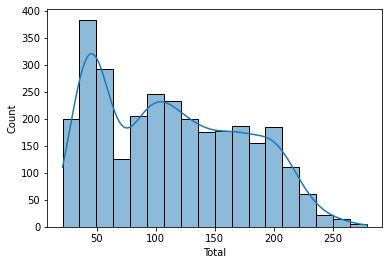

In [3]:
sns.histplot(df['Total'],kde=True)

<AxesSubplot:>

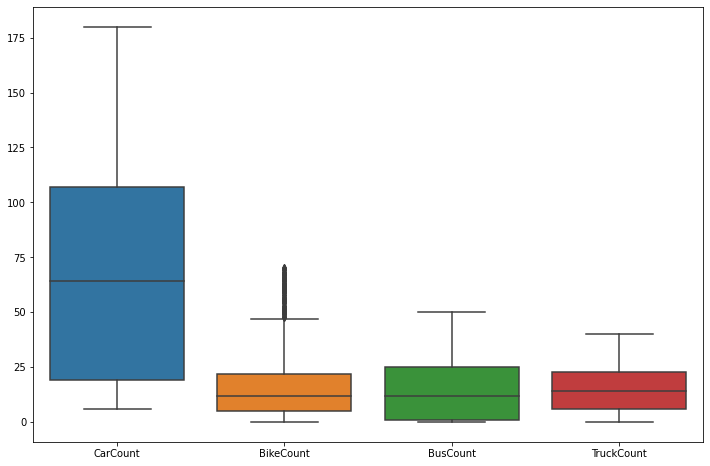

In [4]:
plt.figure(figsize=(12,8))
vehicles = ['CarCount','BikeCount','BusCount','TruckCount']

sns.boxplot(data=df[vehicles])


<AxesSubplot:xlabel='Day of the week', ylabel='count'>

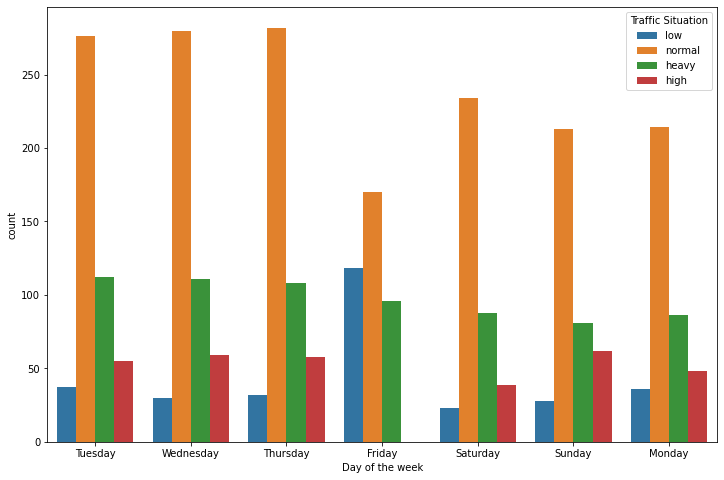

In [5]:
plt.figure(figsize=(12,8))

sns.countplot(x=df['Day of the week'],hue=df['Traffic Situation'])

<AxesSubplot:xlabel='Day of the week', ylabel='Total'>

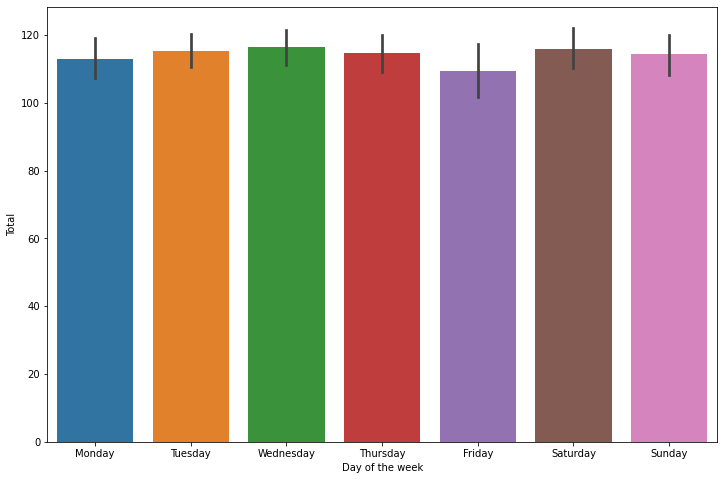

In [6]:

plt.figure(figsize=(12,8))
sns.barplot(x=df['Day of the week'],
            y=df['Total'],
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Traffic Situation', ylabel='count'>

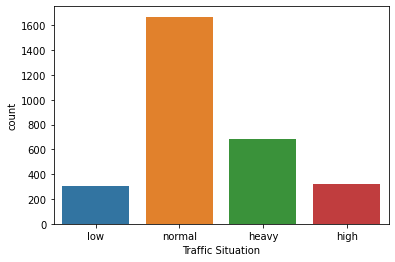

In [7]:
sns.countplot(df['Traffic Situation'])

## Correlation analysis

In [8]:
df['Traffic Situation'].unique()

array(['low', 'normal', 'heavy', 'high'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Traffic Situation'] = le.fit_transform(df['Traffic Situation'])
df['Traffic Situation'].unique()

array([2, 3, 0, 1])

In [10]:
corr_mat = df.drop('Date',axis=1).corr().round(2)
corr_mat

,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
CarCount,1.00,0.72,0.69,-0.63,0.97,-0.75
BikeCount,0.72,1.00,0.57,-0.58,0.80,-0.62
BusCount,0.69,0.57,1.00,-0.55,0.79,-0.70
TruckCount,-0.63,-0.58,-0.55,1.00,-0.56,0.50
Total,0.97,0.80,0.79,-0.56,1.00,-0.78
Traffic Situation,-0.75,-0.62,-0.70,0.50,-0.78,1.00


<AxesSubplot:>

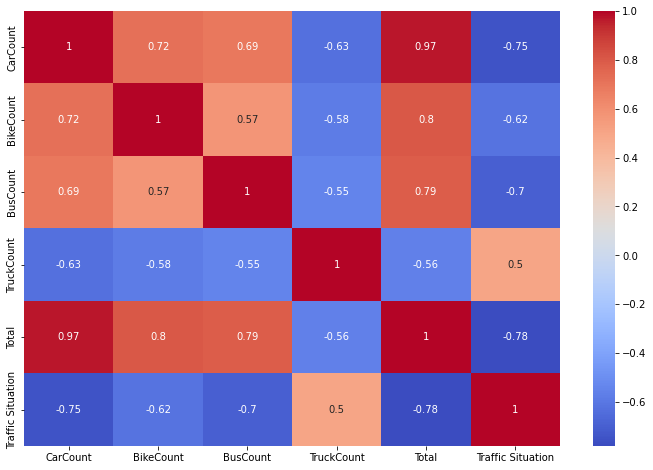

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm')

# Categorical Data

In [12]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,2
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,2
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,2
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,2
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,3
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,3
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,3
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,3
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,3


In [13]:
df.select_dtypes('object').columns

Index(['Time', 'Day of the week'], dtype='object')

### Day of the week 

In [14]:
dummies = pd.get_dummies(df['Day of the week'],drop_first=True)



In [15]:
df = pd.concat([df.drop('Day of the week',axis=1),dummies],axis=1)

### Time

In [16]:
df['Time'].apply(lambda x: x[-2:])

0       AM
1       AM
2       AM
3       AM
4       AM
        ..
2971    PM
2972    PM
2973    PM
2974    PM
2975    PM
Name: Time, Length: 2976, dtype: object

In [17]:
df['momment'] = df['Time'].apply(lambda x:x[-2:])

In [18]:
df['Time'] = pd.to_datetime(df['Time'])
df['Time']

0      2023-11-23 00:00:00
1      2023-11-23 00:15:00
2      2023-11-23 00:30:00
3      2023-11-23 00:45:00
4      2023-11-23 01:00:00
               ...        
2971   2023-11-23 22:45:00
2972   2023-11-23 23:00:00
2973   2023-11-23 23:15:00
2974   2023-11-23 23:30:00
2975   2023-11-23 23:45:00
Name: Time, Length: 2976, dtype: datetime64[ns]

In [19]:
df['hour'] = df['Time'].dt.hour
df['minutes'] =df['Time'].dt.minute

In [20]:
df.drop('Time',axis=1,inplace=True)
df.columns

Index(['Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total',
       'Traffic Situation', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'momment', 'hour', 'minutes'],
      dtype='object')

In [21]:
df.select_dtypes('object')

,momment
0,AM
1,AM
2,AM
3,AM
4,AM
...,...
2971,PM
2972,PM
2973,PM
2974,PM


In [22]:
dummies = pd.get_dummies(df['momment'],drop_first=True)
dummies

,PM
0,0
1,0
2,0
3,0
4,0
...,...
2971,1
2972,1
2973,1
2974,1


In [23]:
df = pd.concat([df.drop('momment',axis=1),dummies],axis=1)
df

,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,hour,minutes,PM
0,10,31,0,4,4,39,2,0,0,0,0,1,0,0,0,0
1,10,49,0,3,3,55,2,0,0,0,0,1,0,0,15,0
2,10,46,0,3,6,55,2,0,0,0,0,1,0,0,30,0
3,10,51,0,2,5,58,2,0,0,0,0,1,0,0,45,0
4,10,57,6,15,16,94,3,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,9,16,3,1,36,56,3,0,0,0,1,0,0,22,45,1
2972,9,11,0,1,30,42,3,0,0,0,1,0,0,23,0,1
2973,9,15,4,1,25,45,3,0,0,0,1,0,0,23,15,1
2974,9,16,5,0,27,48,3,0,0,0,1,0,0,23,30,1


# Modelling

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

from imblearn.over_sampling import RandomOverSampler

In [25]:
X = df.drop('Traffic Situation',axis=1)

y = df['Traffic Situation']

In [26]:
# this is done because there is imbalance between the target label

over_sampler = RandomOverSampler()

In [27]:
X,y = over_sampler.fit_resample(X,y)

In [28]:
df_temp = pd.concat([X,y],axis=1)
df_temp.shape

(6676, 16)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Traffic Situation', ylabel='count'>

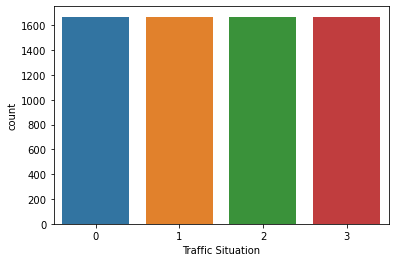

In [29]:
sns.countplot(df_temp['Traffic Situation'])

In [30]:
X = df.drop('Traffic Situation',axis=1)

y = df['Traffic Situation']

In [31]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.2,random_state=42)

X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.2,random_state=42)

In [32]:
model = tf.keras.Sequential([
 
    keras.layers.Dense(X_train.shape[1],activation='relu'),
    
    keras.layers.Dense(8,activation='relu'),
    
    keras.layers.Dense(4,activation='softmax')
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

early_stopping = EarlyStopping(monitor='val_loss',
                               mode='min',
                               patience=10,
                               restore_best_weights=True)

model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=1000)

Epoch 1/1000
75/75 [==============================] - 1s 4ms/step - loss: 1.7949 - accuracy: 0.4000 - val_loss: 1.2225 - val_accuracy: 0.5525
Epoch 2/1000
75/75 [==============================] - 0s 2ms/step - loss: 1.0739 - accuracy: 0.6080 - val_loss: 1.0341 - val_accuracy: 0.6366
Epoch 3/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.9066 - accuracy: 0.6689 - val_loss: 0.8823 - val_accuracy: 0.6912
Epoch 4/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.8092 - accuracy: 0.6933 - val_loss: 0.8167 - val_accuracy: 0.6975
Epoch 5/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.7437 - accuracy: 0.7084 - val_loss: 0.7583 - val_accuracy: 0.7269
Epoch 6/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.7089 - accuracy: 0.7235 - val_loss: 0.7181 - val_accuracy: 0.7311
Epoch 7/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.7332 - val_loss: 0.6969 - val_accuracy: 0.7353
Epoch 

75/75 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8580 - val_loss: 0.4322 - val_accuracy: 0.8487
Epoch 59/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8592 - val_loss: 0.4466 - val_accuracy: 0.8361
Epoch 60/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8605 - val_loss: 0.4310 - val_accuracy: 0.8508
Epoch 61/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.3854 - accuracy: 0.8563 - val_loss: 0.4285 - val_accuracy: 0.8613
Epoch 62/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8639 - val_loss: 0.4116 - val_accuracy: 0.8550
Epoch 63/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8622 - val_loss: 0.4284 - val_accuracy: 0.8508
Epoch 64/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8660 - val_loss: 0.4140 - val_accuracy: 0.8508
Epoch 65/1000

75/75 [==============================] - 0s 2ms/step - loss: 0.2865 - accuracy: 0.8966 - val_loss: 0.3180 - val_accuracy: 0.8824
Epoch 116/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.2878 - accuracy: 0.8950 - val_loss: 0.3276 - val_accuracy: 0.8761
Epoch 117/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.2814 - accuracy: 0.9004 - val_loss: 0.3133 - val_accuracy: 0.8824
Epoch 118/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.2842 - accuracy: 0.9004 - val_loss: 0.3090 - val_accuracy: 0.8908
Epoch 119/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.2805 - accuracy: 0.9038 - val_loss: 0.3153 - val_accuracy: 0.8866
Epoch 120/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.2821 - accuracy: 0.8979 - val_loss: 0.3111 - val_accuracy: 0.8866
Epoch 121/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.9034 - val_loss: 0.3098 - val_accuracy: 0.8866
Epoch 1

Epoch 172/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.2245 - accuracy: 0.9193 - val_loss: 0.2862 - val_accuracy: 0.9034
Epoch 173/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.9214 - val_loss: 0.2581 - val_accuracy: 0.9034
Epoch 174/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.2168 - accuracy: 0.9269 - val_loss: 0.2607 - val_accuracy: 0.9139
Epoch 175/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.2151 - accuracy: 0.9244 - val_loss: 0.2675 - val_accuracy: 0.9034
Epoch 176/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9286 - val_loss: 0.2655 - val_accuracy: 0.8992
Epoch 177/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.9231 - val_loss: 0.2570 - val_accuracy: 0.9139
Epoch 178/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9265 - val_loss: 0.2626 - val_accuracy:

Epoch 229/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1745 - accuracy: 0.9387 - val_loss: 0.2275 - val_accuracy: 0.9244
Epoch 230/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.9349 - val_loss: 0.2165 - val_accuracy: 0.9223
Epoch 231/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1862 - accuracy: 0.9319 - val_loss: 0.2576 - val_accuracy: 0.8992
Epoch 232/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1691 - accuracy: 0.9408 - val_loss: 0.2253 - val_accuracy: 0.9181
Epoch 233/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.9378 - val_loss: 0.2136 - val_accuracy: 0.9307
Epoch 234/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1780 - accuracy: 0.9391 - val_loss: 0.2974 - val_accuracy: 0.8887
Epoch 235/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1697 - accuracy: 0.9391 - val_loss: 0.2186 - val_accuracy:

Epoch 286/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1511 - accuracy: 0.9445 - val_loss: 0.1904 - val_accuracy: 0.9433
Epoch 287/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1492 - accuracy: 0.9429 - val_loss: 0.1911 - val_accuracy: 0.9412
Epoch 288/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1494 - accuracy: 0.9458 - val_loss: 0.1878 - val_accuracy: 0.9454
Epoch 289/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1459 - accuracy: 0.9492 - val_loss: 0.1847 - val_accuracy: 0.9370
Epoch 290/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1494 - accuracy: 0.9450 - val_loss: 0.1961 - val_accuracy: 0.9433
Epoch 291/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1634 - accuracy: 0.9395 - val_loss: 0.1956 - val_accuracy: 0.9412
Epoch 292/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1498 - accuracy: 0.9496 - val_loss: 0.1974 - val_accuracy:

Epoch 343/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1351 - accuracy: 0.9542 - val_loss: 0.1731 - val_accuracy: 0.9433
Epoch 344/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1431 - accuracy: 0.9504 - val_loss: 0.1682 - val_accuracy: 0.9538
Epoch 345/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1312 - accuracy: 0.9580 - val_loss: 0.1920 - val_accuracy: 0.9433
Epoch 346/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1329 - accuracy: 0.9550 - val_loss: 0.1671 - val_accuracy: 0.9538
Epoch 347/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.9525 - val_loss: 0.1794 - val_accuracy: 0.9433
Epoch 348/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1467 - accuracy: 0.9487 - val_loss: 0.1748 - val_accuracy: 0.9559
Epoch 349/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.9521 - val_loss: 0.1736 - val_accuracy:

Epoch 400/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1344 - accuracy: 0.9534 - val_loss: 0.2062 - val_accuracy: 0.9349
Epoch 401/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 0.9546 - val_loss: 0.1691 - val_accuracy: 0.9580
Epoch 402/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1353 - accuracy: 0.9559 - val_loss: 0.2234 - val_accuracy: 0.9118
Epoch 403/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1386 - accuracy: 0.9521 - val_loss: 0.1689 - val_accuracy: 0.9496
Epoch 404/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1267 - accuracy: 0.9588 - val_loss: 0.2048 - val_accuracy: 0.9412
Epoch 405/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1264 - accuracy: 0.9571 - val_loss: 0.1615 - val_accuracy: 0.9538
Epoch 406/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1251 - accuracy: 0.9584 - val_loss: 0.1660 - val_accuracy:

Epoch 457/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.9597 - val_loss: 0.1579 - val_accuracy: 0.9580
Epoch 458/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1233 - accuracy: 0.9601 - val_loss: 0.1518 - val_accuracy: 0.9601
Epoch 459/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.9584 - val_loss: 0.1648 - val_accuracy: 0.9580
Epoch 460/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1295 - accuracy: 0.9521 - val_loss: 0.1802 - val_accuracy: 0.9538
Epoch 461/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1223 - accuracy: 0.9584 - val_loss: 0.1682 - val_accuracy: 0.9538
Epoch 462/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1267 - accuracy: 0.9592 - val_loss: 0.1516 - val_accuracy: 0.9601
Epoch 463/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1205 - accuracy: 0.9601 - val_loss: 0.1561 - val_accuracy:

Epoch 514/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1124 - accuracy: 0.9643 - val_loss: 0.1429 - val_accuracy: 0.9727
Epoch 515/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1100 - accuracy: 0.9630 - val_loss: 0.1472 - val_accuracy: 0.9622
Epoch 516/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1191 - accuracy: 0.9622 - val_loss: 0.1433 - val_accuracy: 0.9622
Epoch 517/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1311 - accuracy: 0.9555 - val_loss: 0.1478 - val_accuracy: 0.9601
Epoch 518/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1220 - accuracy: 0.9592 - val_loss: 0.1497 - val_accuracy: 0.9601
Epoch 519/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1114 - accuracy: 0.9647 - val_loss: 0.1438 - val_accuracy: 0.9664
Epoch 520/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1238 - accuracy: 0.9622 - val_loss: 0.1528 - val_accuracy:

Epoch 571/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1338 - accuracy: 0.9525 - val_loss: 0.1381 - val_accuracy: 0.9622
Epoch 572/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1238 - accuracy: 0.9559 - val_loss: 0.1472 - val_accuracy: 0.9643
Epoch 573/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1063 - accuracy: 0.9655 - val_loss: 0.1480 - val_accuracy: 0.9685
Epoch 574/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1200 - accuracy: 0.9622 - val_loss: 0.1482 - val_accuracy: 0.9580
Epoch 575/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1104 - accuracy: 0.9655 - val_loss: 0.1415 - val_accuracy: 0.9622
Epoch 576/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1217 - accuracy: 0.9597 - val_loss: 0.1478 - val_accuracy: 0.9643
Epoch 577/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1295 - accuracy: 0.9580 - val_loss: 0.1514 - val_accuracy:

Epoch 628/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1041 - accuracy: 0.9668 - val_loss: 0.1427 - val_accuracy: 0.9622
Epoch 629/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1060 - accuracy: 0.9689 - val_loss: 0.1423 - val_accuracy: 0.9622
Epoch 630/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1049 - accuracy: 0.9672 - val_loss: 0.1458 - val_accuracy: 0.9622
Epoch 631/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9655 - val_loss: 0.1691 - val_accuracy: 0.9496
Epoch 632/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1046 - accuracy: 0.9672 - val_loss: 0.1383 - val_accuracy: 0.9601
Epoch 633/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.9672 - val_loss: 0.1692 - val_accuracy: 0.9496
Epoch 634/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1160 - accuracy: 0.9597 - val_loss: 0.1991 - val_accuracy:

Epoch 685/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0998 - accuracy: 0.9723 - val_loss: 0.1589 - val_accuracy: 0.9475
Epoch 686/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1065 - accuracy: 0.9668 - val_loss: 0.1450 - val_accuracy: 0.9580
Epoch 687/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0991 - accuracy: 0.9735 - val_loss: 0.1412 - val_accuracy: 0.9685
Epoch 688/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.9689 - val_loss: 0.1457 - val_accuracy: 0.9601
Epoch 689/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1016 - accuracy: 0.9697 - val_loss: 0.1451 - val_accuracy: 0.9580
Epoch 690/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.9685 - val_loss: 0.1369 - val_accuracy: 0.9622
Epoch 691/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0991 - accuracy: 0.9718 - val_loss: 0.1510 - val_accuracy:

Epoch 742/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1045 - accuracy: 0.9672 - val_loss: 0.1358 - val_accuracy: 0.9580
Epoch 743/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0951 - accuracy: 0.9697 - val_loss: 0.1349 - val_accuracy: 0.9580
Epoch 744/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.9706 - val_loss: 0.1421 - val_accuracy: 0.9580
Epoch 745/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1078 - accuracy: 0.9626 - val_loss: 0.1444 - val_accuracy: 0.9517
Epoch 746/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1013 - accuracy: 0.9702 - val_loss: 0.1346 - val_accuracy: 0.9664
Epoch 747/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0933 - accuracy: 0.9748 - val_loss: 0.1312 - val_accuracy: 0.9622
Epoch 748/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0999 - accuracy: 0.9681 - val_loss: 0.1976 - val_accuracy:

Epoch 799/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0930 - accuracy: 0.9697 - val_loss: 0.1479 - val_accuracy: 0.9538
Epoch 800/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0958 - accuracy: 0.9718 - val_loss: 0.1355 - val_accuracy: 0.9601
Epoch 801/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0970 - accuracy: 0.9739 - val_loss: 0.1378 - val_accuracy: 0.9601
Epoch 802/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1075 - accuracy: 0.9647 - val_loss: 0.1359 - val_accuracy: 0.9622
Epoch 803/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0932 - accuracy: 0.9714 - val_loss: 0.1245 - val_accuracy: 0.9622
Epoch 804/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0993 - accuracy: 0.9693 - val_loss: 0.1973 - val_accuracy: 0.9349
Epoch 805/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0914 - accuracy: 0.9718 - val_loss: 0.1240 - val_accuracy:

Epoch 856/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0869 - accuracy: 0.9748 - val_loss: 0.1534 - val_accuracy: 0.9559
Epoch 857/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0859 - accuracy: 0.9773 - val_loss: 0.1244 - val_accuracy: 0.9664
Epoch 858/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0995 - accuracy: 0.9693 - val_loss: 0.1295 - val_accuracy: 0.9706
Epoch 859/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1091 - accuracy: 0.9622 - val_loss: 0.1925 - val_accuracy: 0.9349
Epoch 860/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.9605 - val_loss: 0.1433 - val_accuracy: 0.9601
Epoch 861/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1100 - accuracy: 0.9597 - val_loss: 0.1323 - val_accuracy: 0.9622
Epoch 862/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.9693 - val_loss: 0.1308 - val_accuracy:

Epoch 913/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0849 - accuracy: 0.9727 - val_loss: 0.1492 - val_accuracy: 0.9580
Epoch 914/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.9693 - val_loss: 0.1189 - val_accuracy: 0.9685
Epoch 915/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0837 - accuracy: 0.9773 - val_loss: 0.1241 - val_accuracy: 0.9664
Epoch 916/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0781 - accuracy: 0.9819 - val_loss: 0.1228 - val_accuracy: 0.9685
Epoch 917/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1057 - accuracy: 0.9639 - val_loss: 0.1354 - val_accuracy: 0.9601
Epoch 918/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0990 - accuracy: 0.9681 - val_loss: 0.1200 - val_accuracy: 0.9706
Epoch 919/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 0.9685 - val_loss: 0.1317 - val_accuracy:

Epoch 970/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0826 - accuracy: 0.9773 - val_loss: 0.1381 - val_accuracy: 0.9622
Epoch 971/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0857 - accuracy: 0.9765 - val_loss: 0.1244 - val_accuracy: 0.9622
Epoch 972/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0778 - accuracy: 0.9794 - val_loss: 0.1275 - val_accuracy: 0.9685
Epoch 973/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.1018 - accuracy: 0.9685 - val_loss: 0.1334 - val_accuracy: 0.9685
Epoch 974/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0834 - accuracy: 0.9765 - val_loss: 0.1274 - val_accuracy: 0.9664
Epoch 975/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0976 - accuracy: 0.9689 - val_loss: 0.1158 - val_accuracy: 0.9706
Epoch 976/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.9702 - val_loss: 0.1245 - val_accuracy:

In [33]:
df2 = pd.DataFrame(model.history.history)
df2

,loss,accuracy,val_loss,val_accuracy
0,1.794861,0.400000,1.222503,0.552521
1,1.073893,0.607983,1.034065,0.636555
2,0.906566,0.668908,0.882317,0.691176
3,0.809167,0.693277,0.816730,0.697479
4,0.743656,0.708403,0.758283,0.726891
...,...,...,...,...
995,0.083000,0.977731,0.119124,0.964286
996,0.094337,0.971008,0.127609,0.966387
997,0.108223,0.959244,0.165999,0.947479
998,0.088153,0.970588,0.226704,0.920168


<AxesSubplot:>

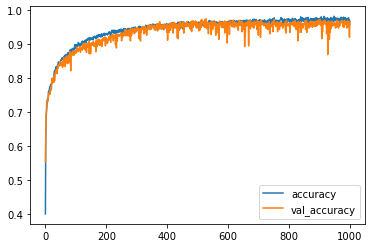

In [34]:
df2.drop(['loss','val_loss'],axis=1).plot()

<AxesSubplot:>

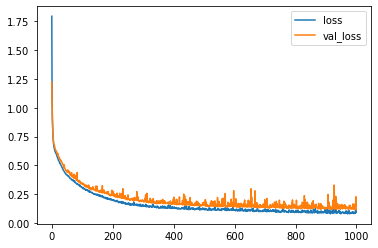

In [35]:
df2.drop(['accuracy','val_accuracy'],axis=1).plot()

In [36]:
model.evaluate(X_train,y_train)

75/75 [==============================] - 0s 1ms/step - loss: 0.0765 - accuracy: 0.9794


[0.07649409770965576, 0.979411780834198]

In [37]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.1437 - accuracy: 0.9333


[0.1436770111322403, 0.9333333373069763]

In [38]:
y_preds = model.predict(X_test)
y_preds

4/4 [==============================] - 0s 1ms/step


array([[1.56959400e-01, 2.72474214e-02, 1.31260611e-22, 8.15793097e-01],
       [9.99963999e-01, 7.81146628e-06, 0.00000000e+00, 2.82135643e-05],
       [4.45460945e-01, 5.54493248e-01, 0.00000000e+00, 4.58229952e-05],
       [3.03908721e-18, 1.93849243e-02, 3.57915745e-26, 9.80615079e-01],
       [0.00000000e+00, 2.94009263e-31, 0.00000000e+00, 1.00000000e+00],
       [2.82634716e-32, 4.52751170e-10, 4.77568797e-14, 1.00000000e+00],
       [0.00000000e+00, 1.98307826e-27, 4.50300798e-02, 9.54969943e-01],
       [4.33445692e-01, 4.61669713e-01, 5.21049519e-22, 1.04884610e-01],
       [0.00000000e+00, 1.29948732e-24, 1.80803180e-16, 1.00000000e+00],
       [0.00000000e+00, 5.25775023e-28, 9.56553933e-12, 1.00000000e+00],
       [9.82773662e-01, 9.33789357e-04, 4.08526605e-29, 1.62925422e-02],
       [0.00000000e+00, 1.46910290e-33, 9.99670506e-01, 3.29498056e-04],
       [4.84482143e-06, 8.36926978e-03, 1.17724952e-09, 9.91625905e-01],
       [1.93012504e-17, 2.90742513e-10, 9.85594332e

In [39]:
y_preds_true = np.argmax(y_preds,axis=1)
y_preds_true

array([3, 0, 1, 3, 3, 3, 3, 1, 3, 3, 0, 2, 3, 2, 3, 3, 3, 2, 1, 3, 2, 0,
       3, 1, 1, 3, 3, 0, 1, 1, 2, 1, 3, 1, 3, 2, 2, 0, 0, 3, 0, 3, 3, 3,
       3, 3, 1, 2, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 0, 3, 1, 1, 3, 0, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0,
       2, 0, 1, 3, 3, 3, 3, 3, 3, 0, 3, 2, 0, 1, 2, 3, 3, 2, 3, 3, 1, 3,
       2, 3, 2, 3, 3, 0, 0, 0, 0, 3], dtype=int64)

In [40]:
print(classification_report(y_test,y_preds_true))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.80      0.92      0.86        13
           2       0.94      0.94      0.94        16
           3       0.96      0.94      0.95        68

    accuracy                           0.93       120
   macro avg       0.91      0.93      0.92       120
weighted avg       0.94      0.93      0.93       120



In [41]:
conf_matr = confusion_matrix(y_test,y_preds_true)
conf_matr

array([[21,  1,  0,  1],
       [ 0, 12,  0,  1],
       [ 0,  0, 15,  1],
       [ 1,  2,  1, 64]], dtype=int64)

array(['low', 'normal', 'heavy', 'high'], dtype=object)
array([2, 3, 0, 1])

<AxesSubplot:>

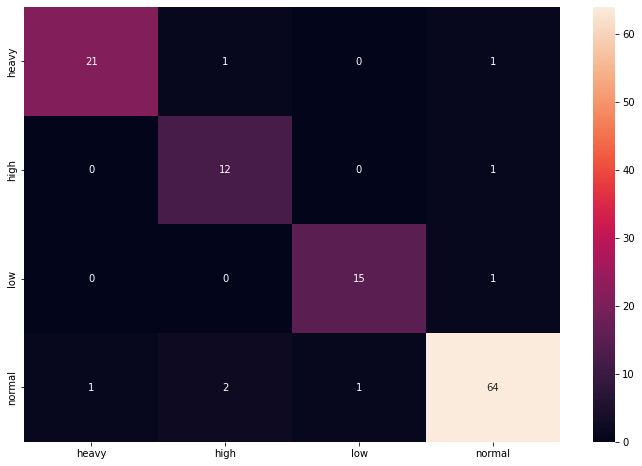

In [42]:
labels = ['heavy','high','low','normal']

plt.figure(figsize=(12,8))
sns.heatmap(conf_matr,annot=True,xticklabels=labels,yticklabels=labels)

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                240       
                                                                 
 dense_1 (Dense)             (None, 8)                 128       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
Total params: 404 (1.58 KB)
Trainable params: 404 (1.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


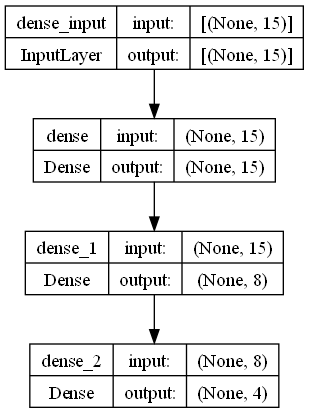

In [44]:
from tensorflow.keras.utils import plot_model
# Save the model architecture to a file
plot_model(model, to_file='ann_visualization.png', show_shapes=True, show_layer_names=True)

# Display the saved image
from IPython.display import Image
Image('ann_visualization.png')

In [45]:
model.save('traffic_predictor.h5')

C:\Users\ASUS ROG\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
